### Energy Usage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

#### Data Import

In [2]:
df = pd.read_csv('electricity.csv')
df.head(2)

,Utility.Number,Utility.Name,Utility.State,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
0,55,City of Aberdeen - (MS),MS,Municipal,32.7,30.7,0.0,204875.0,0.0,204875.0,...,661.0,6025.0,118989.0,2.0,0.0,0.0,0.0,14649.0,198442.0,3258.0
1,59,City of Abbeville - (LA),LA,Municipal,31.4,22.9,0.0,137537.0,0.0,137537.0,...,1032.0,3211.8,37566.0,27.0,0.0,0.0,0.0,12574.4,127849.0,5523.0


#### Cleaning Data

In [3]:
print('The initial dataframe size is: %d' % df.size)

The initial dataframe size is: 80408


In [4]:
# remove duplicates
df.drop_duplicates()
# drop rows containing na values
df = df.dropna()
print('After cleaning, the size is: %d' % df.size)

After cleaning, the size is: 80370


#### Convert column(s) to appropriate data types

In [5]:
df.dtypes

Utility.Number                       int64
Utility.Name                        object
Utility.State                       object
Utility.Type                        object
Demand.Summer Peak                 float64
Demand.Winter Peak                 float64
Sources.Generation                 float64
Sources.Purchased                  float64
Sources.Other                      float64
Sources.Total                      float64
Uses.Retail                        float64
Uses.Resale                        float64
Uses.No Charge                     float64
Uses.Consumed                      float64
Uses.Losses                        float64
Uses.Total                         float64
Revenues.Retail                    float64
Revenue.Delivery                   float64
Revenue.Resale                     float64
Revenue.Adjustments                float64
Revenue.Transmission               float64
Revenue.Other                      float64
Revenue.Total                      float64
Retail.Resi

In [6]:
df['Utility.State'] = df['Utility.State'].astype('category')
df['Utility.Type'] = df['Utility.Type'].astype('category')
df.dtypes

Utility.Number                        int64
Utility.Name                         object
Utility.State                      category
Utility.Type                       category
Demand.Summer Peak                  float64
Demand.Winter Peak                  float64
Sources.Generation                  float64
Sources.Purchased                   float64
Sources.Other                       float64
Sources.Total                       float64
Uses.Retail                         float64
Uses.Resale                         float64
Uses.No Charge                      float64
Uses.Consumed                       float64
Uses.Losses                         float64
Uses.Total                          float64
Revenues.Retail                     float64
Revenue.Delivery                    float64
Revenue.Resale                      float64
Revenue.Adjustments                 float64
Revenue.Transmission                float64
Revenue.Other                       float64
Revenue.Total                   

#### Rename some columns to remove the space

In [7]:
df = df.rename(columns={'Demand.Summer Peak': 'Demand.SummerPeak', 'Demand.Winter Peak': 'Demand.WinterPeak', 'Uses.No Charge':'Uses.NoCharge'})
list(df.columns)

['Utility.Number',
 'Utility.Name',
 'Utility.State',
 'Utility.Type',
 'Demand.SummerPeak',
 'Demand.WinterPeak',
 'Sources.Generation',
 'Sources.Purchased',
 'Sources.Other',
 'Sources.Total',
 'Uses.Retail',
 'Uses.Resale',
 'Uses.NoCharge',
 'Uses.Consumed',
 'Uses.Losses',
 'Uses.Total',
 'Revenues.Retail',
 'Revenue.Delivery',
 'Revenue.Resale',
 'Revenue.Adjustments',
 'Revenue.Transmission',
 'Revenue.Other',
 'Revenue.Total',
 'Retail.Residential.Revenue',
 'Retail.Residential.Sales',
 'Retail.Residential.Customers',
 'Retail.Commercial.Revenue',
 'Retail.Commercial.Sales',
 'Retail.Commercial.Customers',
 'Retail.Industrial.Revenue',
 'Retail.Industrial.Sales',
 'Retail.Industrial.Customers',
 'Retail.Transportation.Revenue',
 'Retail.Transportation.Sales',
 'Retail.Transportation.Customers',
 'Retail.Total.Revenue',
 'Retail.Total.Sales',
 'Retail.Total.Customers']

<AxesSubplot:>

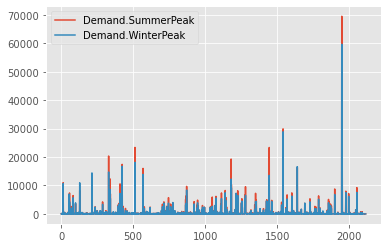

In [8]:
### Plot the Summer Peak and Winter Peak on one graph
df[['Demand.SummerPeak','Demand.WinterPeak']].plot.line()

In [9]:
print("There are %d utilities where the summer peak is greater than winter peak." % df[df['Demand.SummerPeak'] > df['Demand.WinterPeak']].size)
print("There are %d utilities where the summer peak is equal to winter peak." % df[df['Demand.SummerPeak'] == df['Demand.WinterPeak']][df['Demand.SummerPeak'] != 0].size)
print("There are %d utilities where the summer peak is lower than winter peak." % df[df['Demand.SummerPeak'] < df['Demand.WinterPeak']].size)

There are 45296 utilities where the summer peak is greater than winter peak.
There are 836 utilities where the summer peak is equal to winter peak.
There are 26068 utilities where the summer peak is lower than winter peak.


In [10]:
pwr_generated = pd.pivot_table(df, values=['Sources.Total'], index=['Utility.State'], columns=['Utility.Type'], aggfunc='sum').fillna(0)
pwr_generated.head(3)

Sources.Total                                          \
Utility.Type  Behind the Meter Community Choice Aggregator Cooperative   
Utility.State                                                            
AK                         0.0                         0.0   4518506.0   
AL                         0.0                         0.0  11583544.0   
AR                         0.0                         0.0  13014097.0   

                                                                        \
Utility.Type  Federal Investor Owned   Municipal Political Subdivision   
Utility.State                                                            
AK                0.0       498375.0   1899550.0                   0.0   
AL                0.0     66545519.0  16360950.0                   0.0   
AR                0.0     31248886.0   6420696.0                   0.0   

                                                                    
Utility.Type  Retail Power Marketer State Wholesale Power Marketer  
Utility.State                                                       
AK                              0.0   0.0                      0.0  
AL                              0.0   0.0                      0.0  
AR                        5031891.0   0.0                      0.0

In [11]:
pwr_generated_tot = df[['Sources.Total','Utility.State']].groupby('Utility.State').sum()
pwr_generated_tot.reset_index(inplace=True)
pwr_generated_tot = pwr_generated_tot.rename(columns={'Sources.Total': 'Total Generation of Power (MWh)', 'Utility.State':'Utility by State'})
pwr_generated_tot.head(3)

,Utility by State,Total Generation of Power (MWh)
0,AK,6916431.0
1,AL,94490013.0
2,AR,55715570.0


<AxesSubplot:title={'center':'Total Generation of Power (MWh) by State'}, xlabel='Total Generation of Power (MWh)', ylabel='Utility by State'>

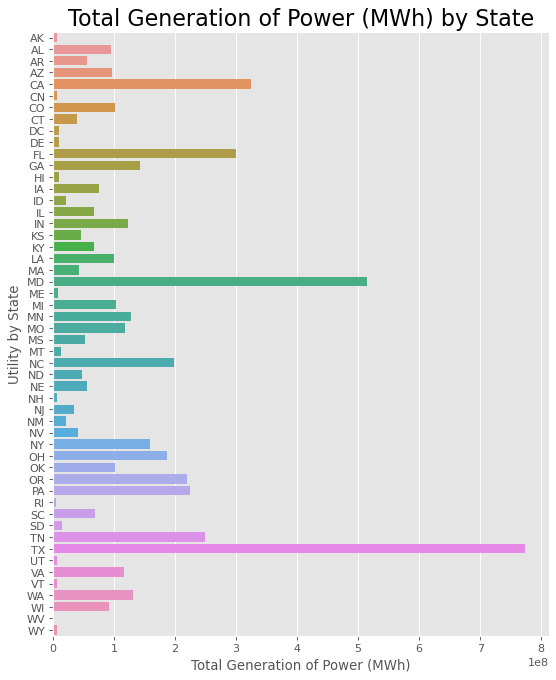

In [12]:
figure(figsize=(8, 10), dpi=80)
fig1 = sns.barplot(data = pwr_generated_tot, y = 'Utility by State' ,x = 'Total Generation of Power (MWh)')
fig1.axes.set_title('Total Generation of Power (MWh) by State', fontsize=20)
fig1
# plt.savefig ('totGenByState.png') # not now

In [13]:
desc_pwr_generated_tot = pwr_generated_tot.sort_values(by='Total Generation of Power (MWh)', ascending=False).reset_index(drop=True)
desc_pwr_generated_tot.head(3)

,Utility by State,Total Generation of Power (MWh)
0,TX,773840664.0
1,MD,514494283.0
2,CA,324458359.0


<AxesSubplot:title={'center':'Descending Order of Total Generation of Power (MWh) by State'}, xlabel='Total Generation of Power (MWh)', ylabel='Utility by State'>

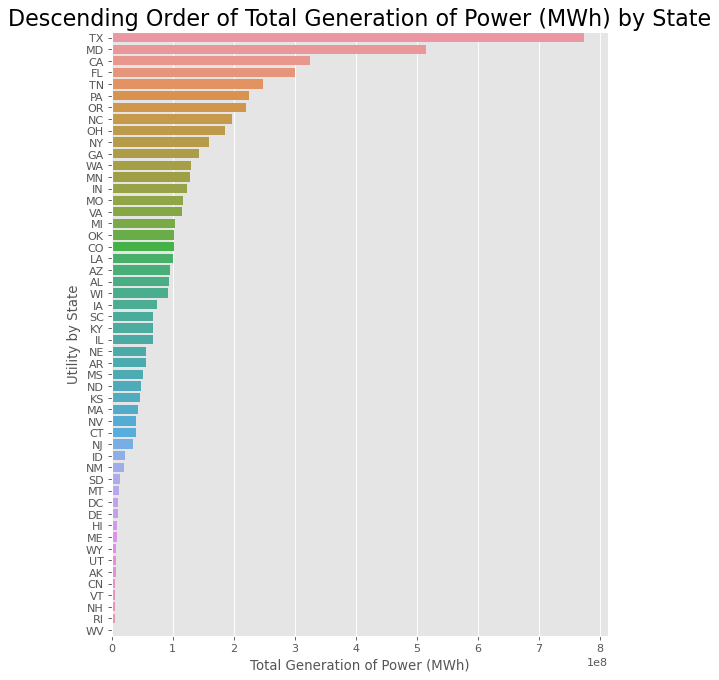

In [26]:
figure(figsize=(8, 10), dpi=80)
fig2 = sns.barplot(data = desc_pwr_generated_tot, y='Utility by State', x='Total Generation of Power (MWh)', order=desc_pwr_generated_tot[desc_pwr_generated_tot.sort_values(by='Total Generation of Power (MWh)', ascending=False).columns[0]])
fig2.axes.set_title('Descending Order of Total Generation of Power (MWh) by State', fontsize=20)
fig2